In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")
# plt.rcParams['text.usetex'] = True
# import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'



In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)
# plt.style.use('seaborn')
# With LaTex fonts
# plt.style.use('tex')

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 469.75502
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def hcf(h_rev, nameplate, base, max_cf, bids):
    
    return (h_rev) / (nameplate * 0.5 * ( base / max_cf) * bids)

def lcoe(base, h_cf):
    return base / h_cf

22.22222222222222 0.9 0
33.333333333333336 0.6 1
26.666666666666668 0.75 2
27.02702702702702 0.7400000000000002 3
27.121128825361918 0.7374324324324325 4
27.159151100082212 0.7364000416029004 5
27.178237880796356 0.7358828812861202 6
27.189166258112945 0.7355871014997462 7
27.196004256733556 0.735402149933409 8
27.200566171979073 0.7352788127110087 9


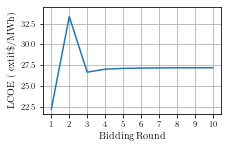

In [6]:
nameplate = 100
base = 20
max_cf = 0.9


mw = 60

x = [base/max_cf]

h_cf = max_cf #hcf(mw * (base / max_cf) *0.5, nameplate, base, max_cf, 1)

past_rev =mw * (base / max_cf) *0.5

print(x[0], h_cf, 0)

failed = False

for i in range(9):
    h_cf = hcf(past_rev, nameplate, base, max_cf, i+1)
    
    if failed and i +1 != 4:
        past_rev += (mw * lcoe(base, h_cf) * 0.5)
    
    elif not failed:
        past_rev += (mw * lcoe(base, h_cf) * 0.5)
    x.append( lcoe(base,h_cf) )

fig, ax = plt.subplots(1, 1, figsize=set_size('thesis', fraction=0.49))

ax.plot(range(1, len(x)+1), x)
ax.grid()
ax.set_xlabel("Bidding Round")
ax.set_ylabel("LCOE (\textit{\$/MWh})")

ax.set_xticks(range(1, 11))
ax.set_yticks([22.5, 25, 27.5, 30, 32.5])
ax.set_ylim(top=34.5)
ax.grid()
plt.grid()
if failed:
    name = "LCOE Failed Rounds.pdf"
else:
    name = "LCOE Rounds.pdf"

plt.savefig(name, facecolor='white', transparent=False,  bbox_inches='tight', dpi=600)